In [1]:
import xgboost as xgb
import matplotlib.pyplot as plt
from pylab import plot, show, subplot, specgram, imshow, savefig

bst = xgb.Booster()  # init model
bst.load_model('test.model')

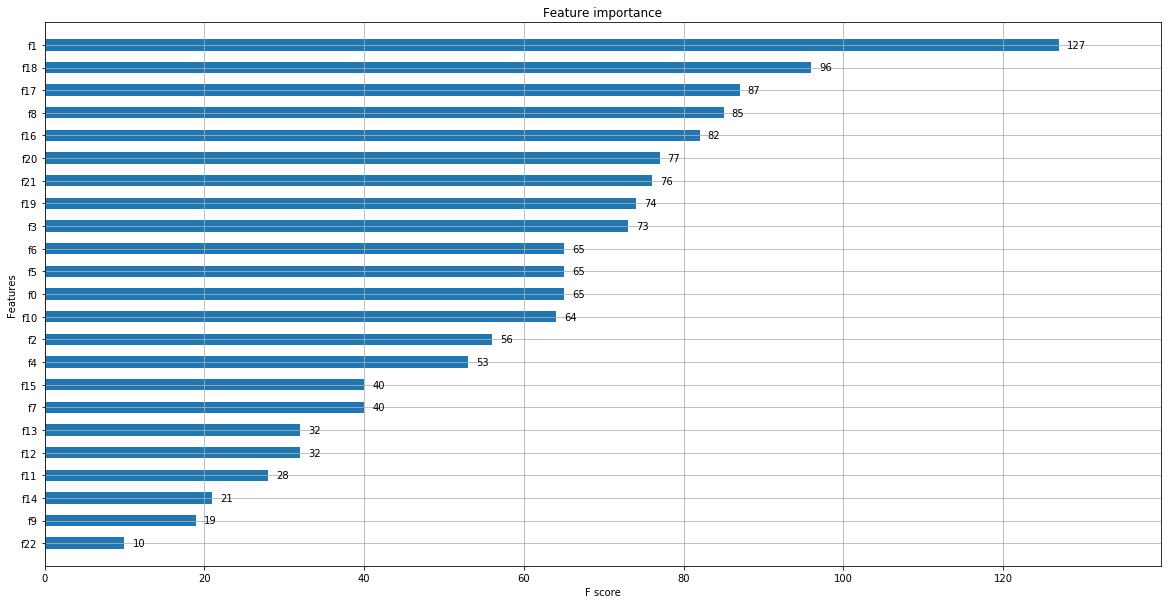

In [7]:
%matplotlib inline
fig, ax = plt.subplots(figsize=(20, 10))
xgb.plot_importance(bst, height=0.5, ax=ax)

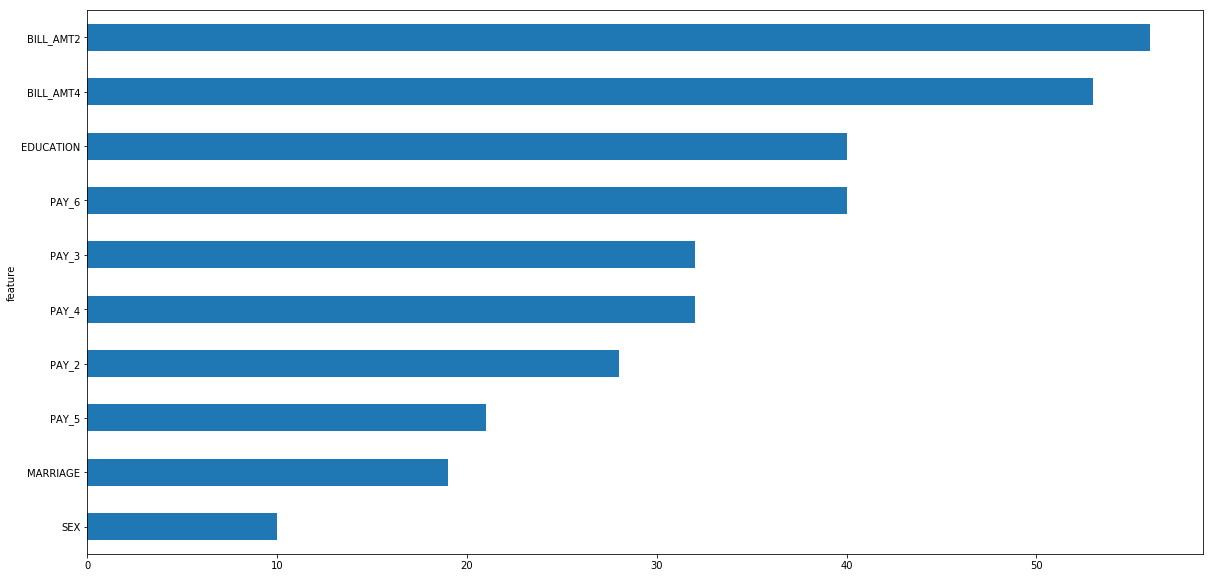

In [3]:
import operator
import pandas as pd

importance = bst.get_fscore(fmap='xgb.fmap')
importance = sorted(importance.items(), key=operator.itemgetter(1))

df = pd.DataFrame(importance, columns=['feature', 'fscore'])

plt.figure()
num_f = 10
df[:num_f].plot(kind='barh', x='feature', y='fscore', legend=False, figsize=(20, 10))
#plt.gcf().savefig('features_importance.png')

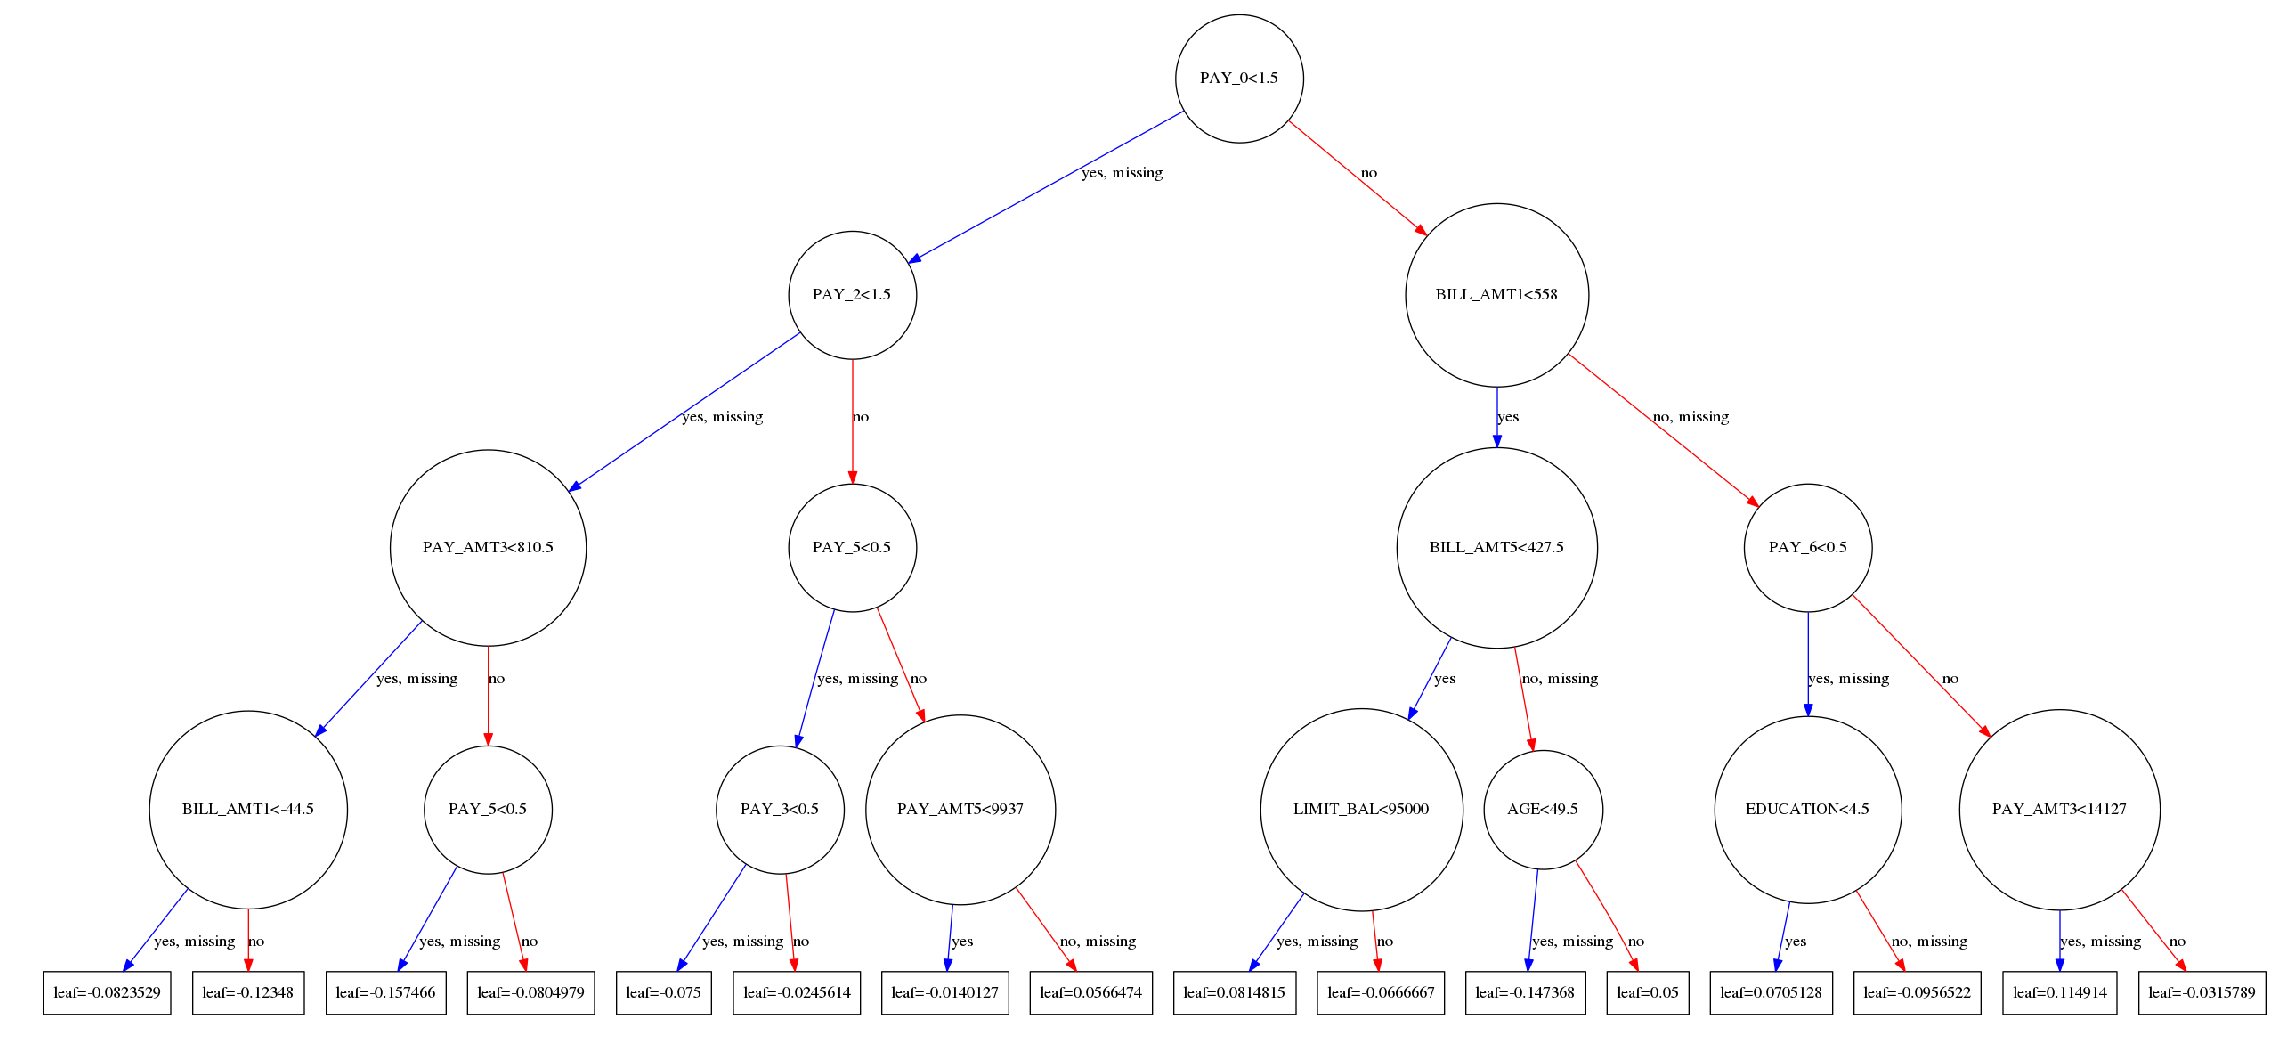

In [16]:
fig, ax = plt.subplots(figsize=(40, 30))
xgb.plot_tree(bst, fmap='xgb.fmap', ax=ax)